# Song Recommendation Project - A/B Testing for Different kNN Methods
### Justin Gong | June 2023 - July 2023

This notebook will analyze and compare the performance of *two* potential algorithms to select songs with similar audio features. This will achieved through A/B testing on a user survey where a group of selected testers were *randomly* divided into two groups and assigned a treatment. The following are the two algorithms being tested:

1. Taking the average audio features of ALL songs in the playlist and using the kNN model to find the nearest neighbors to the "average song"
2. Finding the nearest neighbors for each song in the playlist (indepdently) and only keeping overlapping songs 

These methods are pros and cons respectively. The first method is more efficient and only requires the model to be used once, but is easily influenced by outlier songs, which can severely affect the accuracy of the recommendation. The second method is not influenced by outliers while taking into consideration every song, but will run much slower and potentially misses good recommenations due to a lack of overlap. 

## Experimental Design

48 testers were selected, ranging in the age group of 20-23, all residing in New Jersey in the summer of 2023. It is important to note that users were *not* randomly sampled from the population. Using an Excel spreadsheet, each tester was indexed to have an assigned number. Using a random number generator, the first 24 numbers selected from 1-48 were assigned to model 1 and the other 24 were assigned to model 2. This was conducted as a controlled, blind experiment. Users were all asked to pick a playlist that was "upbeat" and send the playlist. 10 songs were sent back to the tester who were asked to listen to approximately 10 seconds at any time stamp of each song and then fill out the survey. Users were unaware of what algorithm they received. 

The questions on the survey are detailed below: 
1. % of songs that you would add to your playlist 
2. % of songs that you liked (regardless of adding to playlist)
3. From 1-5, how accurate was the recommended songs?
4. From 1-5, how would you rate the model overall?

## A/B Test

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [10]:
#NOTE: I mistakenly switched model 1 and model 2 during assignment, hence the switched data file names
data_1 = pd.read_csv("data/user_model2_results.csv")
data_2 = pd.read_csv("data/model1_results.csv")

### Initial Exploratory Data Analysis

In [19]:
data_1.head()

,Q1,Q2,Q3,Q4
0,45,75,3,5
1,40,75,4,3
2,50,70,2,5
3,40,80,3,2
4,55,75,2,5


In [20]:
data_2.head()

,Q1,Q2,Q3,Q4
0,25,50,3,3
1,50,50,2,3
2,55,55,2,3
3,35,40,3,2
4,55,50,2,3


<AxesSubplot:xlabel='Question', ylabel='Average Values'>

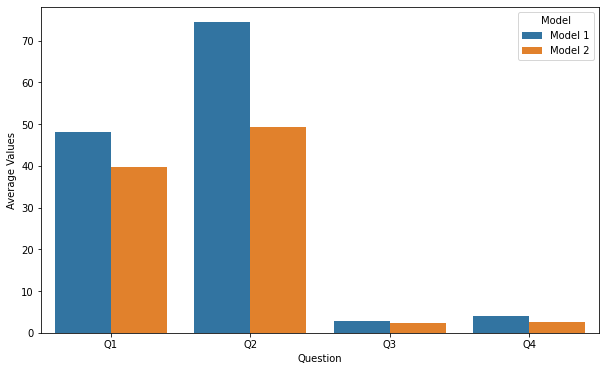

In [34]:
avg_data = pd.DataFrame({
    'Question': data_1.columns,
    'Model 1': data_1.mean().values,
    'Model 2': data_2.mean().values
})

plt.figure(figsize = (10, 6))
sns.barplot(x='Question', 
            y='Average Values', 
            hue='Model', 
            data=avg_data.melt(id_vars='Question', var_name='Model', value_name='Average Values'))

Just from the side-by-side barplot, we can already see that model 1 generally performs better. However, it is important to perform a standard hypothesis test to ensure that these results are not purely from chance. Therefore, I'll perform a hypothesis test that mean model 1 > mean model 2 with null hypothesis that they are equal.

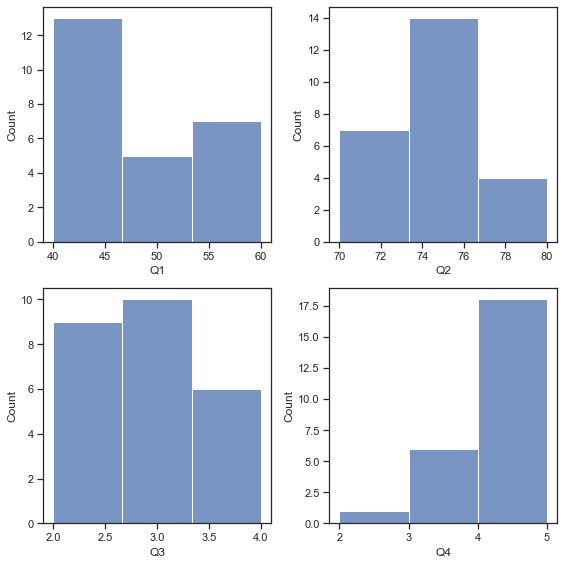

In [58]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(8,8))

for i, question in enumerate(data_1.columns):
    plt.subplot(2, 2, (i + 1))
    sns.histplot(data_1[question], bins = 3)
    
plt.tight_layout()

Due to question 2 and question 3 have approximately normally distributed responses, we'll perform the statistical tests on these two questions in order to meet assumptions.

## Statistical Test

Now we may perform an A/B test to compare the performance of the two models.

The null hypothesis is that the metrics of both models yield the same results. The alternate hypothesis is that the two models yields different results. If there statistically significant evidence to show that the null hypothesis is false, then we may say that model 1 is liked more than model 2 due to the exploratory data analysis. We will test with an alpha of 0.05.

In [60]:
mean_model_1 = np.mean(data_1['Q2'])
std_model_1 = np.std(data_1['Q2'])

mean_model_2 = np.mean(data_2['Q2'])
std_model_2 = np.std(data_2['Q2'])

In [61]:
t_statistic, p_value = stats.ttest_ind(data_1['Q2'], data_2['Q2'])

In [62]:
print("T statistic: ", t_statistic)
print("P-Value: ", p_value)

T statistic:  20.026929238823463
P-Value:  5.979156492705756e-25


In [64]:
effect_size = (mean_model_1 - mean_model_2) / np.sqrt((std_model_1**2 + std_model_2**2) / 2)

In [66]:
print("Cohen's D: ", effect_size)

Cohen's D:  5.781276493538156


From the A/B test from the user survey, we can reject the null hypothesis that the two models produce the same amount of liked songs in the recommendations, and conclude with statistical significance that model 1 produces songs that are liked by users more than model 2. By Cohen's D, we can see that the effect size is also significantly large, suggesting a meaningful difference between the two averages. Let's explore the rating for the accuracy of recommended songs as well.

In [68]:
mean_model_1 = np.mean(data_1['Q3'])
std_model_1 = np.std(data_1['Q3'])

mean_model_2 = np.mean(data_2['Q3'])
std_model_2 = np.std(data_2['Q3'])

t_statistic, p_value = stats.ttest_ind(data_1['Q3'], data_2['Q3'])

print("T statistic: ", t_statistic)
print("P-Value: ", p_value)

effect_size = (mean_model_1 - mean_model_2) / np.sqrt((std_model_1**2 + std_model_2**2) / 2)

print("Cohen's D: ", effect_size)

T statistic:  2.3631790843301284
P-Value:  0.02221724574386678
Cohen's D:  0.6821910402406464


We can see that the strength of the difference is slightly weaker due to a smaller effect size, which we may classify as a *medium-strengthed effect size.* However, due to a P-value of less than 0.05, which we our intended alpha prior to testing, we may reject the null hypothesis that the two models are rated the same by users. We may conclude with statistical significance that model 1 is more liked by users than model 2, while considering a medium sized Cohen's D.

## Conclusion

In conclusion, the exploratory data analysis and A/B testing provided significant evidence to reject the hypothesis that both models are equally liked by users. We may state that model 1 produced better results due to the visualizations. The distribution plots and bar plots in pair with the A/B test provides evidence t